# Part I - (FIFA19 Data Exploration)
## by (Ayeni Trust)

## Introduction
> This dataset contains detailed attributes for every player registered in the latest edition of FIFA 19 database.


## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Know the file encoding
import chardet
with open('kl.csv', 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'Windows-1252', 'confidence': 0.7295681401555737, 'language': ''}


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
df = pd.read_csv('kl.csv',  encoding = 'Windows-1252')
df.sample(7)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
12252,12252,212782,H. Boateng,22.0,https://cdn.sofifa.org/players/4/19/212782.png,England,https://cdn.sofifa.org/flags/14.png,63.0,69,Exeter City,...,61.0,58.0,63.0,57.0,10.0,16.0,9.0,10.0,12.0,€975K
17263,17263,245485,P. Samiec-Talar,16.0,https://cdn.sofifa.org/players/4/19/245485.png,Poland,https://cdn.sofifa.org/flags/37.png,55.0,73,?l?sk Wroc?aw,...,43.0,31.0,21.0,24.0,14.0,8.0,14.0,13.0,10.0,€356K
5636,5636,231423,C. De Norre,21.0,https://cdn.sofifa.org/players/4/19/231423.png,Belgium,https://cdn.sofifa.org/flags/7.png,70.0,79,Sint-Truidense VV,...,61.0,66.0,67.0,67.0,11.0,8.0,13.0,14.0,11.0,€4.7M
11757,11757,236474,M. Bundu,21.0,https://cdn.sofifa.org/players/4/19/236474.png,Sierra Leone,https://cdn.sofifa.org/flags/138.png,64.0,73,Aarhus GF,...,55.0,33.0,41.0,36.0,6.0,7.0,10.0,7.0,7.0,€1M
8191,8191,240507,A. Gomes,17.0,https://cdn.sofifa.org/players/4/19/240507.png,England,https://cdn.sofifa.org/flags/14.png,67.0,87,Manchester United,...,69.0,36.0,38.0,35.0,14.0,15.0,14.0,6.0,14.0,€4.3M
14498,14498,245446,M. Borquez,19.0,https://cdn.sofifa.org/players/4/19/245446.png,Chile,https://cdn.sofifa.org/flags/55.png,61.0,71,CD Palestino,...,27.0,6.0,14.0,13.0,61.0,63.0,60.0,61.0,63.0,€465K
5066,5066,215123,A. Aguerre,27.0,https://cdn.sofifa.org/players/4/19/215123.png,Argentina,https://cdn.sofifa.org/flags/52.png,70.0,73,Newell's Old Boys,...,50.0,15.0,19.0,12.0,68.0,70.0,63.0,68.0,70.0,€2.4M


In [5]:
df.shape

(18207, 89)

**Note:**  This data set contains 89 columns. I will extract the following columns for analysis:

In [6]:
df.drop(['Unnamed: 0','Photo', 'Flag', 'Club Logo', 'Special', 'Real Face', 'Loaned From'], axis=1, inplace = True)

In [7]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Rele

In [8]:
df.drop(df.columns[21:47],axis=1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18206 non-null  float64
 3   Nationality               18207 non-null  object 
 4   Overall                   18206 non-null  float64
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [10]:
# Check for null values
df.isnull().sum()

ID                             0
Name                           0
Age                            1
Nationality                    0
Overall                        1
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallContro

In [11]:
# Drop rows with null values
df.dropna(axis=0, inplace=True)

In [12]:
df.isnull().sum() # Rows with empty values are removed

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility   

In [13]:
# Check for duplicates
df.duplicated().sum()

0

##### Correcting Datatypes

In [14]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [15]:
# correct column name
df.rename(columns={'ID': 'id', 'Name': 'name', 'Age': 'age', 'Nationality':'nationality', 'Overall':'overall', 'Potential':'potential', 'Club':'club',
       'Value':'value', 'Wage':'wage', 'Preferred Foot':'preferred_foot', 'International Reputation':'international_reputation',
       'Weak Foot':'weak_foot', 'Skill Moves':'skills', 'Work Rate':'work_rate', 'Body Type':'body_type', 'Position':'position',
       'Jersey Number': 'jersey_number', 'Joined':'date_joined', 'Contract Valid Until': 'contract_expires', 'Height':'height', 'Weight':'weight',
       'Crossing':'crossing', 'Finishing':'finishing', 'HeadingAccuracy':'heading_accuracy', 'ShortPassing':'short_passing', 'Volleys':'volleys',
       'Dribbling':'dribbling', 'Curve':'curve', 'FKAccuracy':'fk_accuracy', 'LongPassing':'long_passing', 'BallControl':'ball_control',
       'Acceleration':'acc', 'SprintSpeed':'spd', 'Agility':'agility', 'Reactions':'reaction', 'Balance':'balance',
       'ShotPower':'shot_power', 'Jumping':'jumping', 'Stamina':'stamina', 'Strength':'strength', 'LongShots':'long_shots',
       'Aggression':'aggression', 'Interceptions':'interceptions', 'Positioning':'positioning', 'Vision':'vision', 'Penalties':'penalties',
       'Composure':'composure', 'Marking':'marking', 'StandingTackle':'standing_tackle', 'SlidingTackle':'sliding_tackle', 'GKDiving':'gk_diving',
       'GKHandling':'gk_handling', 'GKKicking':'gk_kicking', 'GKPositioning':'gk_positioning', 'GKReflexes':'gk_reflexes',
       'Release Clause':'release_clause'}, inplace = True)

In [16]:
# Precorrection
# Removing Euro sign from columns Value, Wage and Release Clause
df['value'] = df['value'].str.replace('€', '')
df['wage'] = df['wage'].str.replace('€', '')
df['release_clause'] = df['release_clause'].str.replace('€', '')

In [17]:
# Replacing suffix K and M as 000 and 000000 respectively
df['value'] = df['value'].str.replace('K','000')
df['wage'] = df['wage'].str.replace('K','000')
df['release_clause'] = df['release_clause'].str.replace('K','000')

# Replacing suffix K and M as 000 and 000000 respectively
df['value'] = df['value'].str.replace('M','000000')
df['wage'] = df['wage'].str.replace('M','000000')
df['release_clause'] = df['release_clause'].str.replace('M','000000')

In [18]:
df

,id,name,age,nationality,overall,potential,club,value,wage,preferred_foot,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,release_clause
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,110.5000000,565000,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5000000
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,77000000,405000,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1000000
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,118.5000000,290000,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1000000
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,72000000,260000,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6000000
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,102000000,355000,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,60000,1000,Right,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,60000,1000,Right,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,60000,1000,Right,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,60000,1000,Right,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000


In [19]:
''' Removing '.' with '' and if 
110.5M == 110,500,000, replacing 000000 with 00000 would affect all values in columns.
Hence, for values with decimal points reduce all zeros once 
'''

# Locate values with decimal points
ac = df[df.value.str.contains(r'\d+\.\d*')][['value']]

# Convert all into 6 decimal place
ac['value'] = ac.loc[:, 'value'].map(lambda x: x.replace('000000','00000'))


# Add new column to df
df['values'] = ac.value
    
    

In [20]:
df

,id,name,age,nationality,overall,potential,club,value,wage,preferred_foot,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,release_clause,values
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,110.5000000,565000,Left,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5000000,110.500000
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,77000000,405000,Right,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1000000,NaN
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,118.5000000,290000,Right,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1000000,118.500000
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,72000000,260000,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6000000,NaN
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,102000000,355000,Right,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,60000,1000,Right,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000,NaN
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,60000,1000,Right,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000,NaN
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,60000,1000,Right,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000,NaN
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,60000,1000,Right,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000,NaN


In [21]:
# Move the column
first_column = df.pop('value')

df

,id,name,age,nationality,overall,potential,club,wage,preferred_foot,international_reputation,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,release_clause,values
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,565000,Left,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5000000,110.500000
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,405000,Right,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1000000,NaN
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,290000,Right,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1000000,118.500000
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,260000,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6000000,NaN
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,355000,Right,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,1000,Right,1.0,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000,NaN
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,1000,Right,1.0,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000,NaN
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,1000,Right,1.0,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000,NaN
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,1000,Right,1.0,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000,NaN


In [22]:
# insert column using insert(position,column_name)
df.insert(56, 'value', first_column)

In [23]:
df.columns[55:57]

Index(['values', 'value'], dtype='object')

In [24]:
# Remove old values of Million from original column value
df['value'] = df['value'].replace(r'\d+\.\d*', np.nan, regex=True)
df

,id,name,age,nationality,overall,potential,club,wage,preferred_foot,international_reputation,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,release_clause,values,value
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,565000,Left,5.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5000000,110.500000,NaN
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,405000,Right,5.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1000000,NaN,77000000
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,290000,Right,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1000000,118.500000,NaN
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,260000,Right,4.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6000000,NaN,72000000
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,355000,Right,4.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4000000,NaN,102000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,1000,Right,1.0,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000,NaN,60000
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,1000,Right,1.0,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000,NaN,60000
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,1000,Right,1.0,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000,NaN,60000
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,1000,Right,1.0,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000,NaN,60000


In [25]:
# Merge Columns into new column value1
df['value1'] = df[df.columns[55:57]].apply(lambda y: ','.join(y.dropna().astype(str)), axis=1)

In [26]:
# Dropping the other two columns
df.drop(['value', 'values'], axis=1, inplace=True)
df

,id,name,age,nationality,overall,potential,club,wage,preferred_foot,international_reputation,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,release_clause,value1
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,565000,Left,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5000000,110.500000
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,405000,Right,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1000000,77000000
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,290000,Right,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1000000,118.500000
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,260000,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6000000,72000000
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,355000,Right,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4000000,102000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,1000,Right,1.0,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000,60000
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,1000,Right,1.0,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000,60000
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,1000,Right,1.0,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000,60000
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,1000,Right,1.0,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000,60000


> Do the same for `Realease Clause` column

In [27]:
# Locate values with decimal points
bc = df[df['release_clause'].str.contains(r'\d+\.\d*')][['release_clause']]

# Convert all into 6 decimal place
bc['release_clause'] = bc.loc[:, 'release_clause'].map(lambda x: x.replace('000000','00000'))


# Add new column to df
df['release_clauses'] = bc['release_clause']

In [28]:
# Move the column
first_column = df.pop('release_clause')

df

,id,name,age,nationality,overall,potential,club,wage,preferred_foot,international_reputation,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,value1,release_clauses
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,565000,Left,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110.500000,226.500000
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,405000,Right,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000,127.100000
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,290000,Right,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118.500000,228.100000
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,260000,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000,138.600000
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,355000,Right,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000,196.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,1000,Right,1.0,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,60000,NaN
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,1000,Right,1.0,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,60000,NaN
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,1000,Right,1.0,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,60000,NaN
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,1000,Right,1.0,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,60000,NaN


In [29]:
# insert column using insert(position,column_name)
df.insert(56, 'release_clause', first_column)

In [30]:
df

,id,name,age,nationality,overall,potential,club,wage,preferred_foot,international_reputation,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,value1,release_clauses,release_clause
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,565000,Left,5.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110.500000,226.500000,226.5000000
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,405000,Right,5.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000,127.100000,127.1000000
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,290000,Right,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118.500000,228.100000,228.1000000
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,260000,Right,4.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000,138.600000,138.6000000
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,355000,Right,4.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000,196.400000,196.4000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,1000,Right,1.0,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,60000,NaN,143000
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,1000,Right,1.0,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,60000,NaN,113000
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,1000,Right,1.0,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,60000,NaN,165000
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,1000,Right,1.0,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,60000,NaN,143000


In [31]:
df.columns[55:57]

Index(['release_clauses', 'release_clause'], dtype='object')

In [32]:
# Remove old values of Million from original column value
df['release_clause'] = df['release_clause'].replace(r'\d+\.\d*', np.nan, regex=True)
df

,id,name,age,nationality,overall,potential,club,wage,preferred_foot,international_reputation,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,value1,release_clauses,release_clause
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,565000,Left,5.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110.500000,226.500000,NaN
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,405000,Right,5.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000,127.100000,NaN
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,290000,Right,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118.500000,228.100000,NaN
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,260000,Right,4.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000,138.600000,NaN
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,355000,Right,4.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000,196.400000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,1000,Right,1.0,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,60000,NaN,143000
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,1000,Right,1.0,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,60000,NaN,113000
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,1000,Right,1.0,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,60000,NaN,165000
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,1000,Right,1.0,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,60000,NaN,143000


In [33]:
# Merge Columns into new column value1
df['release_clause1'] = df[df.columns[55:57]].apply(lambda y: ','.join(y.dropna().astype(str)), axis=1)

In [34]:
# Dropping the other two columns
df.drop(['release_clause', 'release_clauses'], axis=1, inplace=True)
df

,id,name,age,nationality,overall,potential,club,wage,preferred_foot,international_reputation,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,value1,release_clause1
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,565000,Left,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110.500000,226.500000
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,405000,Right,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000,127.100000
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,290000,Right,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118.500000,228.100000
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,260000,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000,138.600000
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,355000,Right,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000,196.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,1000,Right,1.0,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,60000,143000
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,1000,Right,1.0,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,60000,113000
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,1000,Right,1.0,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,60000,165000
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,1000,Right,1.0,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,60000,143000


In [35]:
# Rename modified columns
df.rename(columns={'release_clause1':'release_clause', 'value1': 'value'}, inplace=True)

In [36]:
df

,id,name,age,nationality,overall,potential,club,wage,preferred_foot,international_reputation,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,value,release_clause
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,565000,Left,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110.500000,226.500000
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,405000,Right,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000,127.100000
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,290000,Right,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118.500000,228.100000
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,260000,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000,138.600000
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,355000,Right,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000,196.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,1000,Right,1.0,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,60000,143000
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,1000,Right,1.0,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,60000,113000
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,1000,Right,1.0,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,60000,165000
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,1000,Right,1.0,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,60000,143000


In [37]:
# remove '.' replace with ''
df['value'] = df['value'].str.replace('.', '')
df['release_clause'] = df['release_clause'].str.replace('.', '')

In [38]:
df

,id,name,age,nationality,overall,potential,club,wage,preferred_foot,international_reputation,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,value,release_clause
0,158023,L. Messi,31.0,Argentina,94.0,94,FC Barcelona,565000,Left,5.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000,226500000
1,20801,Cristiano Ronaldo,33.0,Portugal,94.0,94,Juventus,405000,Right,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000,127100000
2,190871,Neymar Jr,26.0,Brazil,92.0,93,Paris Saint-Germain,290000,Right,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000,228100000
3,193080,De Gea,27.0,Spain,91.0,93,Manchester United,260000,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000,138600000
4,192985,K. De Bruyne,27.0,Belgium,91.0,92,Manchester City,355000,Right,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000,196400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19.0,England,47.0,65,Crewe Alexandra,1000,Right,1.0,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,60000,143000
18203,243165,N. Christoffersson,19.0,Sweden,47.0,63,Trelleborgs FF,1000,Right,1.0,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,60000,113000
18204,241638,B. Worman,16.0,England,47.0,67,Cambridge United,1000,Right,1.0,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,60000,165000
18205,246268,D. Walker-Rice,17.0,England,47.0,66,Tranmere Rovers,1000,Right,1.0,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,60000,143000


> For `height` and `weight` column

In [39]:
df.height

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: height, Length: 16641, dtype: object

In [40]:
df.weight

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: weight, Length: 16641, dtype: object

In [41]:
# remove lbs and '
df['height'] = df.loc[:, 'height'].map(lambda x: x.replace("'",'.'))
df['weight'] = df.loc[:, 'weight'].map(lambda x: x.replace('lbs',''))

In [42]:
df.weight

0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: weight, Length: 16641, dtype: object

In [43]:
df.height

0         5.7
1         6.2
2         5.9
3         6.4
4        5.11
         ... 
18202     5.9
18203     6.3
18204     5.8
18205    5.10
18206    5.10
Name: height, Length: 16641, dtype: object

In [44]:
df.iloc[:, 10:12]

,weak_foot,skills
0,4.0,4.0
1,4.0,5.0
2,5.0,5.0
3,3.0,1.0
4,5.0,4.0
...,...,...
18202,2.0,2.0
18203,2.0,2.0
18204,3.0,2.0
18205,3.0,2.0


In [45]:
df.iloc[:, 21:56]

,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acc,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,value,release_clause
0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000,226500000
1,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000,127100000
2,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000,228100000
3,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000,138600000
4,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000,196400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,60000,143000
18203,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,60000,113000
18204,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,60000,165000
18205,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,...,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,60000,143000


In [46]:
#change datatypes
df['value'] = df['value'].astype(int)
df['wage'] = df['wage'].astype(int)
df['release_clause'] = df['release_clause'].astype(int)
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(int)
df['jersey_number'] = df['jersey_number'].astype(int)
df['contract_expires'] = pd.to_datetime(df['contract_expires'])
df.iloc[:, 10:12] = df.iloc[:, 10:12].astype(int)
df.iloc[:, 21:56] = df.iloc[:, 21:56].astype(int)

# convert source to category datatype
df.body_type = df.body_type.astype("category")
df.positioning = df.positioning.astype("category")
df.work_rate = df.work_rate.astype("category")

In [47]:
df.shape

(16641, 56)

In [48]:
df.describe()

,id,age,overall,potential,wage,international_reputation,weak_foot,skills,jersey_number,height,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,value,release_clause
count,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,...,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,1.664100e+04,1.664100e+04
mean,213848.178234,25.226008,66.159966,71.138513,9583.438495,1.114536,2.942732,2.349558,19.657773,5.795364,...,47.328826,47.776516,45.752359,16.743705,16.511928,16.351662,16.500391,16.833423,2.434878e+06,4.568780e+06
std,30546.705818,4.716818,7.003983,6.147915,22030.982876,0.397687,0.659729,0.755812,16.055511,0.448854,...,19.936749,21.680085,21.293915,17.824950,17.026602,16.607361,17.144364,18.083102,5.675771e+06,1.101822e+07
min,16.000000,16.000000,46.000000,48.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,5.100000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+04,1.300000e+04
25%,199575.000000,21.000000,62.000000,67.000000,1000.000000,1.000000,3.000000,2.000000,8.000000,5.110000,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,3.000000e+05,5.250000e+05
50%,221502.000000,25.000000,66.000000,71.000000,3000.000000,1.000000,3.000000,2.000000,17.000000,5.900000,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,6.750000e+05,1.100000e+06
75%,236804.000000,29.000000,71.000000,75.000000,8000.000000,1.000000,3.000000,3.000000,26.000000,6.100000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.000000e+06,3.500000e+06
max,246620.000000,45.000000,94.000000,95.000000,565000.000000,5.000000,5.000000,5.000000,99.000000,6.900000,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,1.185000e+08,2.281000e+08


#### Observation
- `Seventy-five percent` of the participants in the sample are under the age of `29`. The oldest player is `45` years old, while the youngest is `16` years old.
- The greatest player worth is `€118,500,000`, while the lowest is `€10,000`.
- The average weekly income is `€9583`, while the least and best paid player makes `€1000 ` and `€565000` respectively.


### What is the structure of your dataset?

>- I began cleaning with `18207` rows and `89` characteristics.
I deleted columns that were not required for my research, as well as null values.
The dataset has `16,641` observations and 56 characteristics to work with.

>- The majority of variables are numerical in character, however the variables body type, placement, and work rate are categorical in nature and will be useful for this project. Features such as age, height, and weight will also play a role.

### What is/are the main feature(s) of interest in your dataset?

> I'm primarily interested in learning what characteristics each playing position must have. Factors that impact a player's ability to become a good footballer.

- age 
- nationality 
- overall 
- potential
- club 
- value 
- wage 
- international_reputation 
- work_rate 
- body_type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
>- I believe that a player's `age` and `position` will have a significant impact on his or her **worth**, which will influence how much the player gets.
Also, I'd like to know if a player's `height` and `weight` affect which position he or she may play.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## First Visualization

> Question 1:  Which country has the highest number of players?

> Visualization

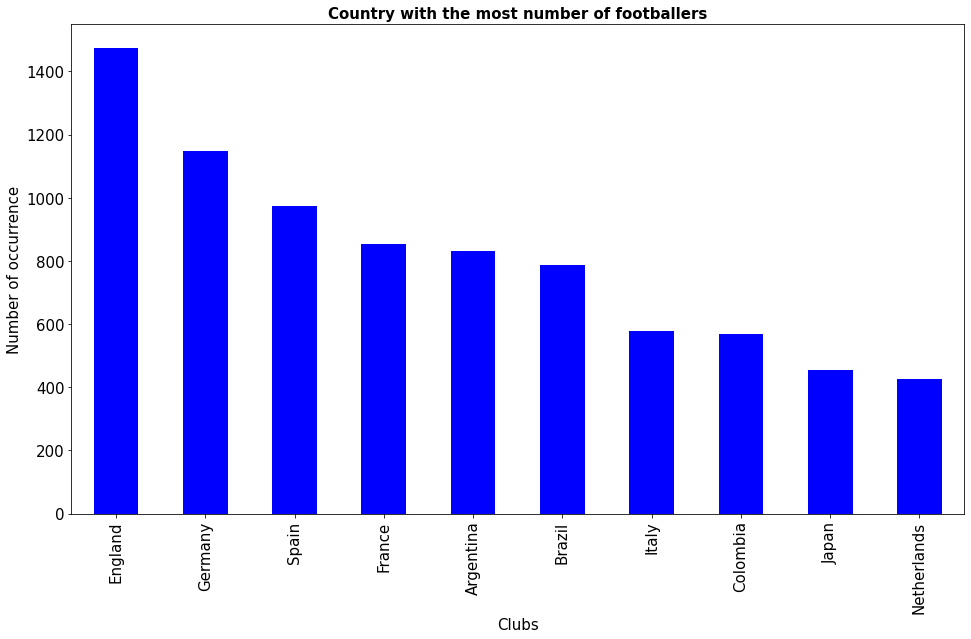

In [49]:
nation = df.nationality.value_counts()[0:10]

#plot
g_bar = nation.plot.bar(color = 'blue', fontsize= 15)

#figure size(width, height)
g_bar.figure.set_size_inches(16, 9);

#Add labels
plt.title('Country with the most number of footballers', color = 'black', fontsize = '15', weight = "bold")
plt.xlabel('Clubs', color = 'black', fontsize = '15')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '15');

> Observation 1:  
- England tops the nation with the most number of footballers in the data. 
- Japan comes out `9th` in the list.

## Second Visualization:

> Question 2: What are the top football clubs?

> Visualization

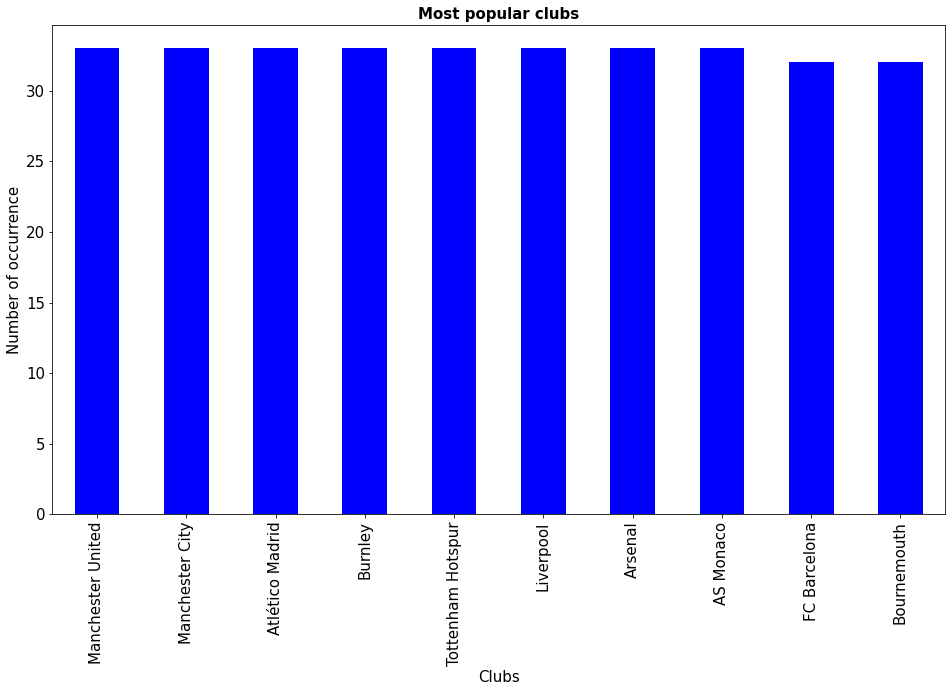

In [50]:
club = df.club.value_counts()[0:10]

#plot
g_bar = club.plot.bar(color = 'blue', fontsize = 15)

#figure size(width, height)
g_bar.figure.set_size_inches(16, 9);

#Add labelbs
plt.title('Most popular clubs', color = 'black', fontsize = '15', weight = "bold")
plt.xlabel('Clubs', color = 'black', fontsize = '15')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '15');

> Observation 2:
- The majority of borrowers are employed, with all other groups accounting for only a minor portion of borrowers.
- Full-time work has the highest priority in small groups, followed by self-employed workers, and so on.

## Third Visualization:

> Question 3:  What is the top most played position?

> Visualization

In [51]:
position_count = df['position'].value_counts()
position_order = position_count.index
print(position_order, position_count)

Index(['ST', 'GK', 'CB', 'CM', 'LB', 'RB', 'RM', 'LM', 'CAM', 'CDM', 'RCB',
       'LCB', 'RCM', 'LCM', 'LW', 'RW', 'RDM', 'LDM', 'LS', 'RS', 'RWB', 'LWB',
       'CF', 'RAM', 'LAM', 'LF', 'RF'],
      dtype='object') ST     1924
GK     1899
CB     1646
CM     1276
LB     1223
RB     1199
RM     1022
LM     1012
CAM     877
CDM     873
RCB     615
LCB     595
RCM     355
LCM     352
LW      338
RW      325
RDM     228
LDM     224
LS      184
RS      179
RWB      84
LWB      76
CF       66
RAM      21
LAM      20
LF       15
RF       13
Name: position, dtype: int64


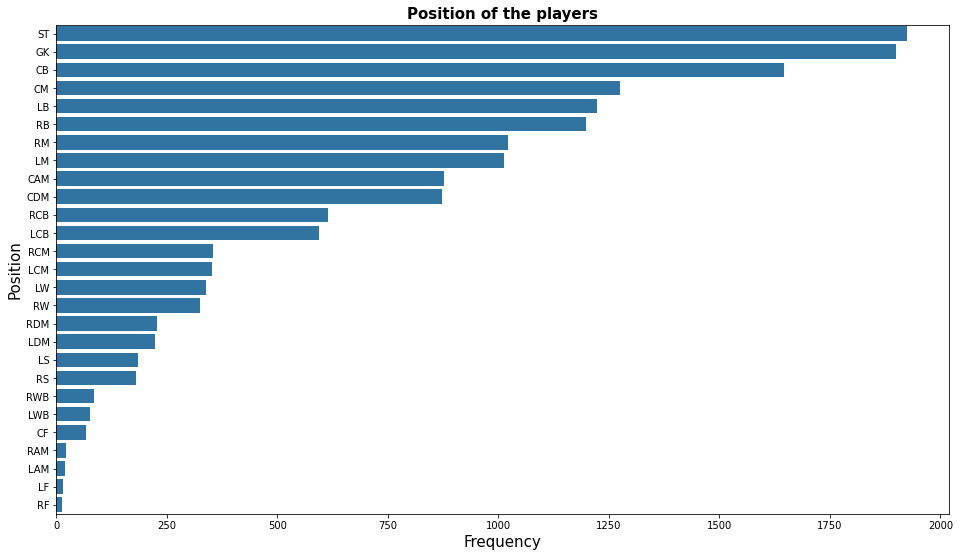

In [52]:
ax = plt.subplots(1,1, figsize=(16,9))

base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'position', color = base_color, order = position_count.index)
plt.title('Position of the players', color = 'black', fontsize = '15', weight = "bold")
plt.ylabel('Position', color = 'black', fontsize = '15')
plt.xlabel('Frequency', color = 'black', fontsize = '15');

> Observation 3: 
- The most played position is the `striker(ST)` position

## Fourth Visualization:

> Question 4:  What is the most used stronger foot?

> Visualization

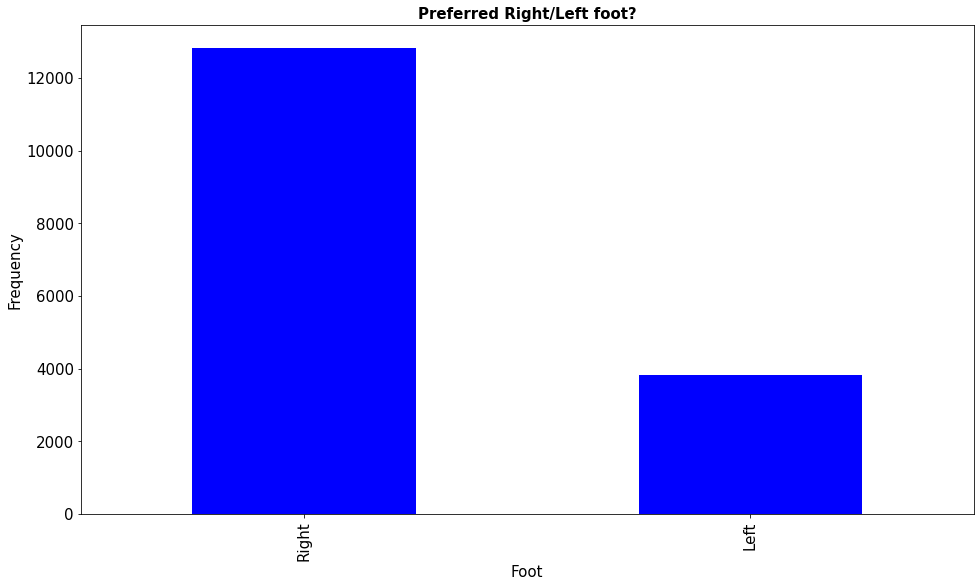

In [53]:
plt.figure(figsize=[16, 9])
foot = df.preferred_foot.value_counts()
g_bar = foot.plot.bar(color = 'blue', fontsize = 15)
plt.title('Preferred Right/Left foot?', color = 'black', fontsize = '15', weight = "bold")

plt.ylabel('Frequency', color = 'black', fontsize = '15')
plt.xlabel('Foot', color = 'black', fontsize = '15');

> Observation 4: 
- Many players use their `right` foot because it's their stronger foot and less than 4000 players have their `left` foot as their stronger foot

> Visualization

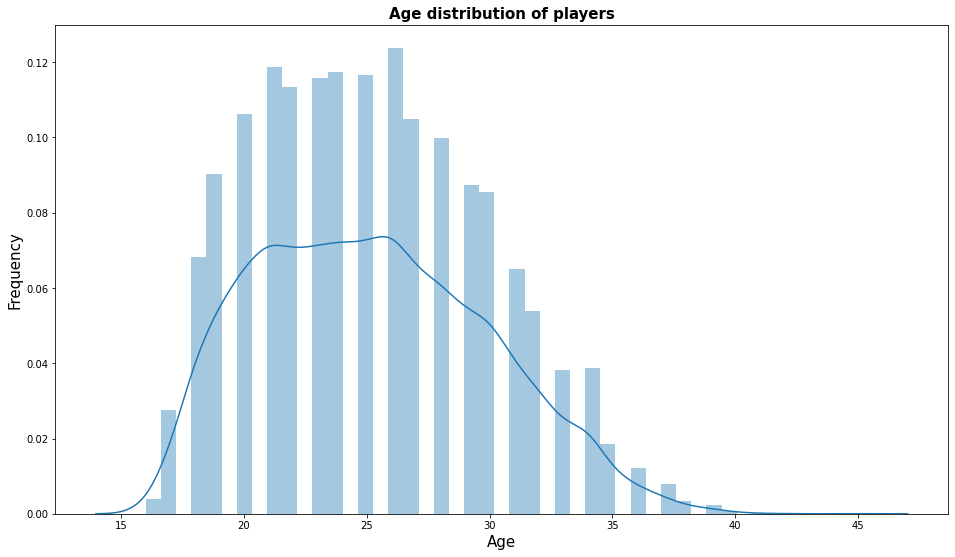

In [54]:
plt.figure(figsize=[16, 9])
sb.distplot(df['age'])
# Add labels
plt.title('Age distribution of players', fontsize='15', weight = "bold")
plt.xlabel('Age', fontsize='15')
plt.ylabel('Frequency', fontsize='15');

> Observation 5: Many players are in their 20's

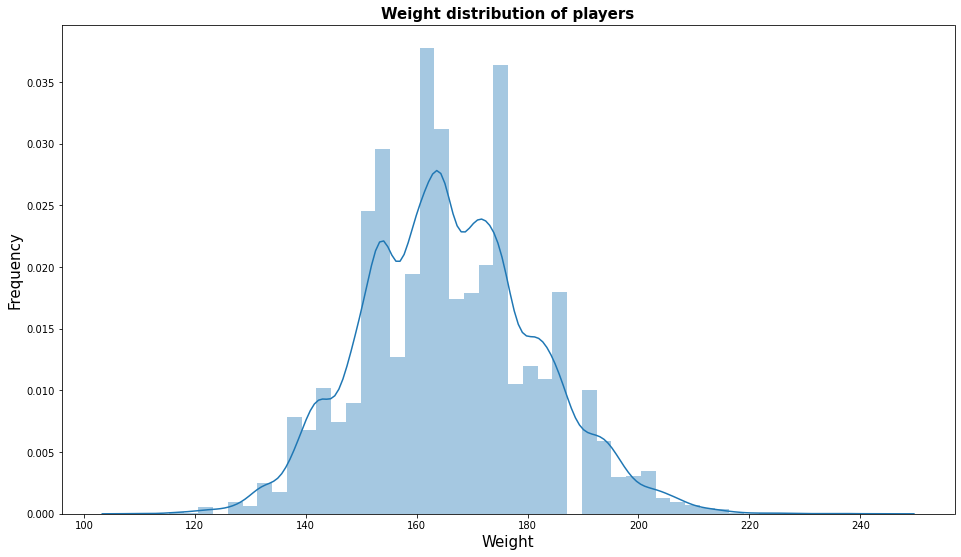

In [55]:
#histogram
plt.figure(figsize=[16, 9])
sb.distplot(df['weight'])
# Add labels
plt.title('Weight distribution of players', fontsize='15', weight = "bold")
plt.xlabel('Weight', fontsize='15')
plt.ylabel('Frequency', fontsize='15');

> Observation 6: Weight is normally distributed

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 Continuous variables:
>- Weight is normally distributed, while the ages of players are right skewed 
>- I also had to transform the `release_clause` and `value` columns suffix into the required number of zero's
>- `height` and `weight` columns had to be cleaned to display the proper documentation of values

 Categorical variables:
>- The data types of columns `body_type`, `work_rate` and `positioning` had to be transformed into categorical datatypes
>- Many players played the position `ST`
>- Many players have their best foot as `right`

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The following columns had to be cleaned and tidied up:
>- Much work was done cleaning the `value` and `release_clause` columns, changing the strings `M` and `K` into their equivalent zero value.
>- The height also had the str `'` replaced with `.`
>- All this modifications and the changing of column names into lower case was also necessary in order to work effectively and smoothly with the dataframe

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> Visualization

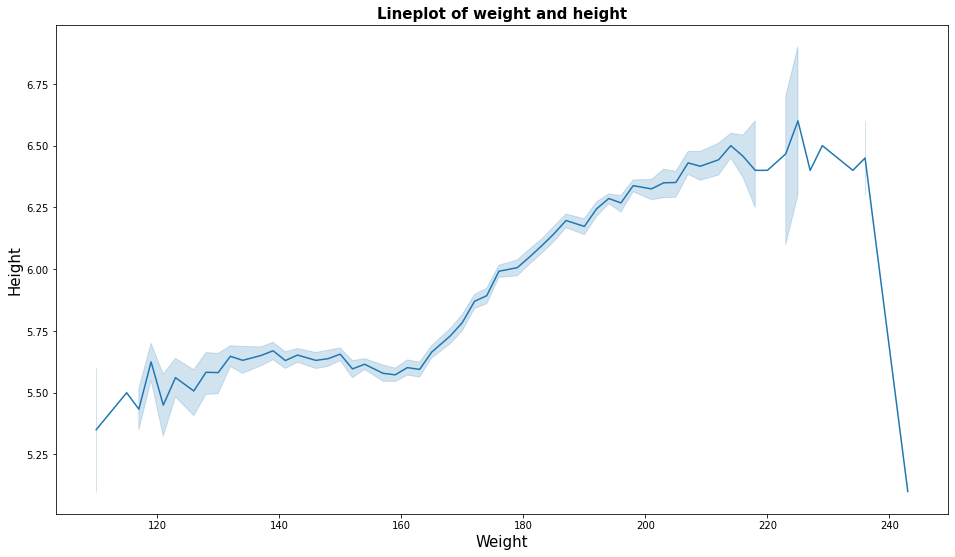

In [56]:
# Lineplot of weight and height
plt.figure(figsize=[16, 9])
sb.lineplot(data = df, x='weight', y='height');
plt.title('Lineplot of weight and height', color = 'black', fontsize = '15', weight = "bold")
plt.xlabel('Weight',  fontsize = '15')
plt.ylabel('Height',  fontsize = '15');

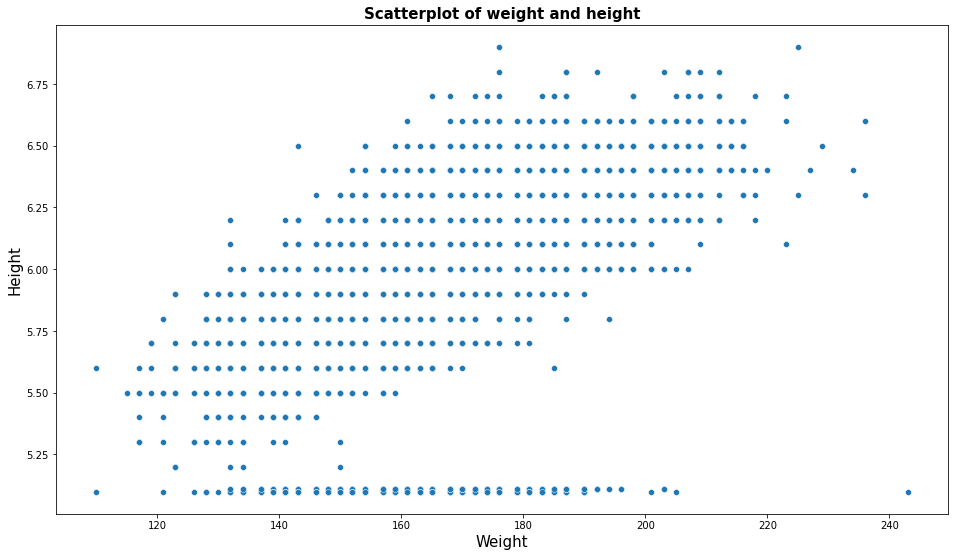

In [57]:
# scatterplot of weight and height
plt.figure(figsize=[16, 9])
sb.scatterplot(data = df, x='weight', y='height');
plt.title('Scatterplot of weight and height', color = 'black', fontsize = '15', weight = "bold")
plt.xlabel('Weight',  fontsize = '15')
plt.ylabel('Height',  fontsize = '15');

> Visualization

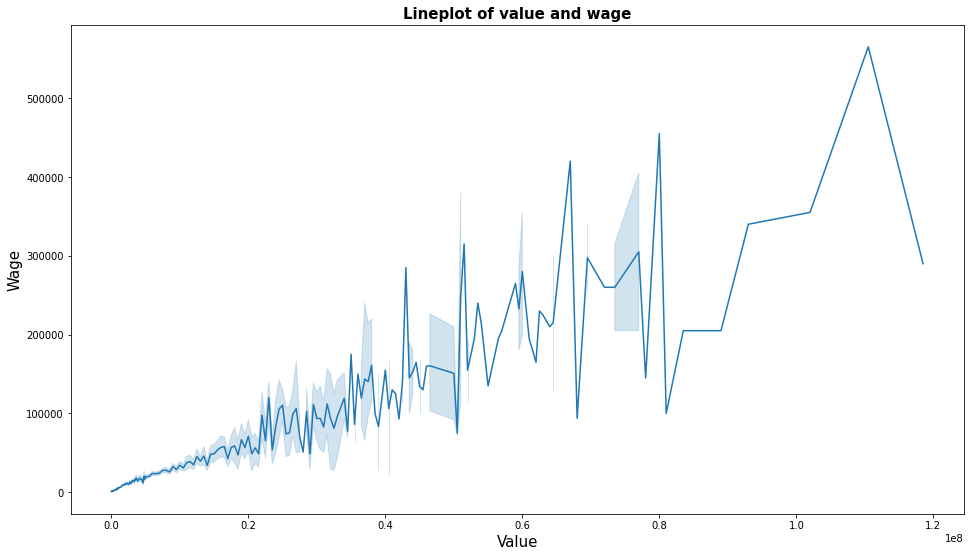

In [58]:
# lineplot of value and wage
plt.figure(figsize=[16, 9])
sb.lineplot(data = df, x='value', y='wage');
plt.title('Lineplot of value and wage', color = 'black', fontsize = '15', weight = "bold")
plt.xlabel('Value',  fontsize = '15')
plt.ylabel('Wage',  fontsize = '15');


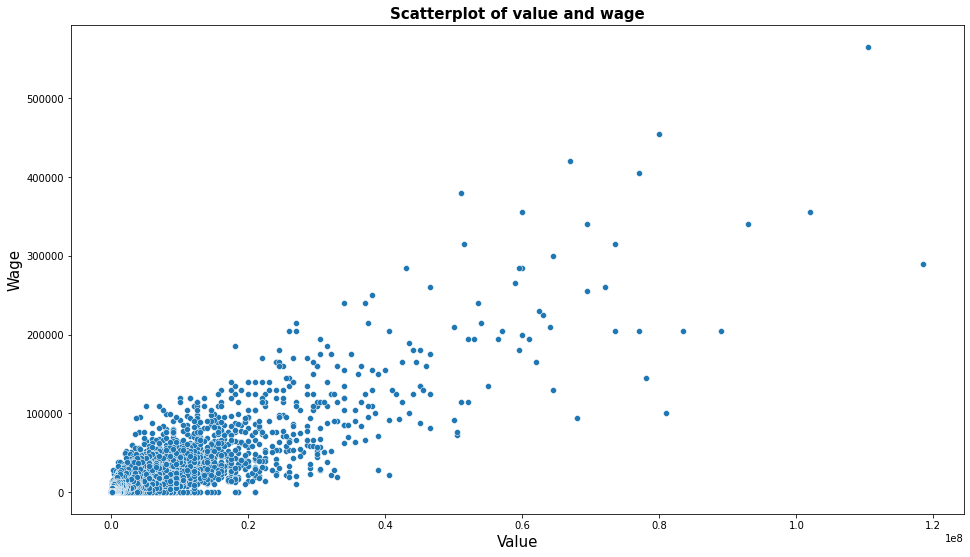

In [59]:
# scatterplot of value and wage
plt.figure(figsize=[16, 9])
sb.scatterplot(data = df, x='value', y='wage');
plt.title('Scatterplot of value and wage', color = 'black', fontsize = '15', weight = "bold")
plt.xlabel('Value',  fontsize = '15')
plt.ylabel('Wage',  fontsize = '15');

In [60]:
df.columns

Index(['id', 'name', 'age', 'nationality', 'overall', 'potential', 'club',
       'wage', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skills', 'work_rate', 'body_type', 'position', 'jersey_number',
       'date_joined', 'contract_expires', 'height', 'weight', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'acc', 'spd', 'agility', 'reaction', 'balance', 'shot_power', 'jumping',
       'stamina', 'strength', 'long_shots', 'aggression', 'interceptions',
       'positioning', 'vision', 'penalties', 'composure', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'value',
       'release_clause'],
      dtype='object')

#### Heatmap

> Visualization

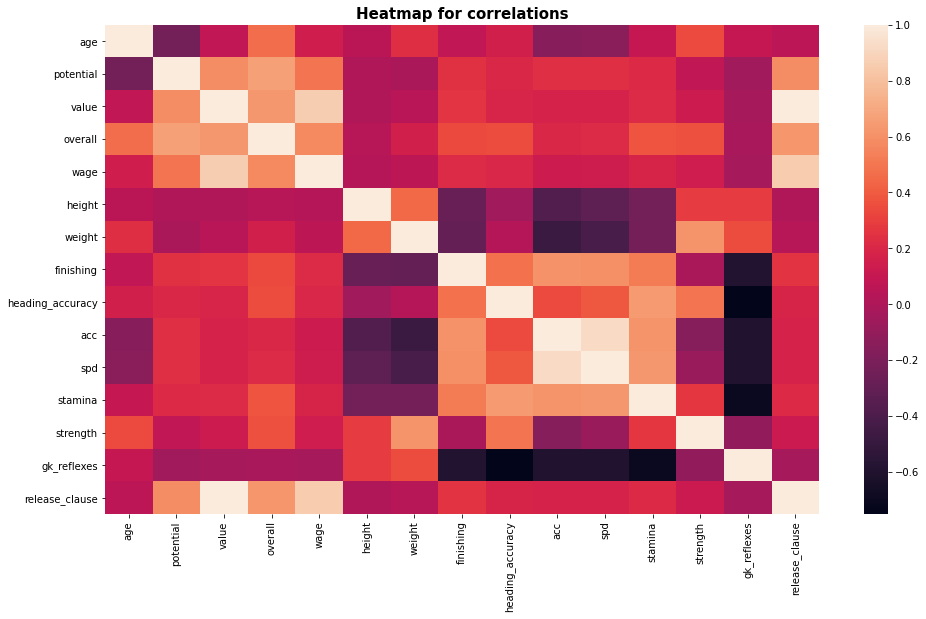

In [61]:
# Lets plot a heatmap to further prove and strenghten my correlations
df_hist = df[['age', 'potential', 'value', 'overall', 'wage', 'height', 'weight', 'finishing', 'heading_accuracy', 
                     'acc','spd','stamina','strength','gk_reflexes','release_clause',]]

# plotting heatmap
f, ax = plt.subplots(figsize=(16, 9))
plt.title('Heatmap for correlations', color = 'black', fontsize = '15', weight = 'bold')

corr = df_hist.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values);


> Observation 7:
- The lineplot shows that the `wage`'s of players is directly proportional to thier `value` indicating a strong positive correlation between them.
- There is also a positive correlation between the `weight` and `strength` of players
- There is a fairly positive correlation between `weight` and `height` of players

I also have a strong positive correlation between:
- value and release_clause
- wage and release_clause
- stamina and heading_accuracy
- spd and acc

#### Violin plots

> Visualization

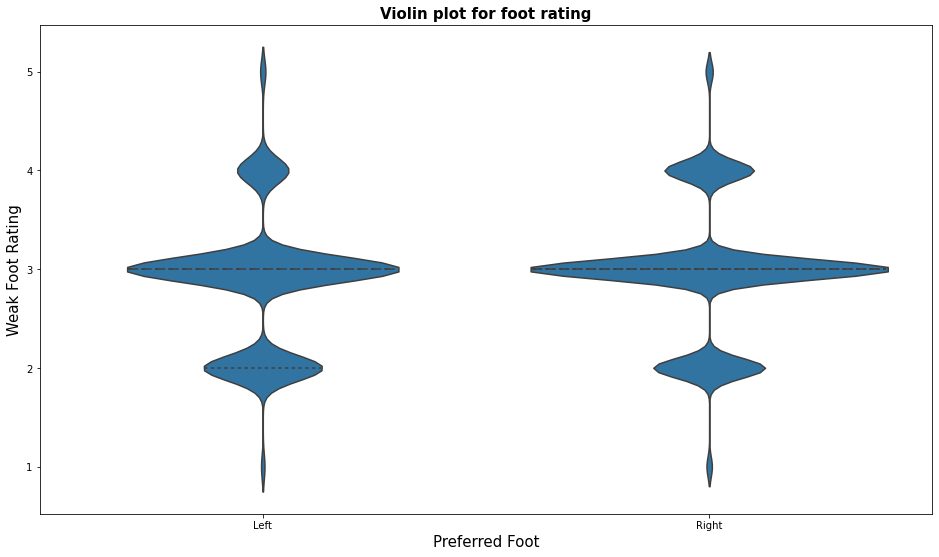

In [62]:
# plotting violin plot
ax = plt.subplots(1,1, figsize=(16,9))

base_color = sb.color_palette()[0]
plt.title('Violin plot for foot rating', color = 'black', fontsize = '15', weight = 'bold')
sb.violinplot(data = df, x = 'preferred_foot', y = 'weak_foot', 
             color = base_color,
              inner = 'quartile')
plt.ylabel('Weak Foot Rating', color = 'black', fontsize = '15')
plt.xlabel('Preferred Foot', color = 'black', fontsize = '15');

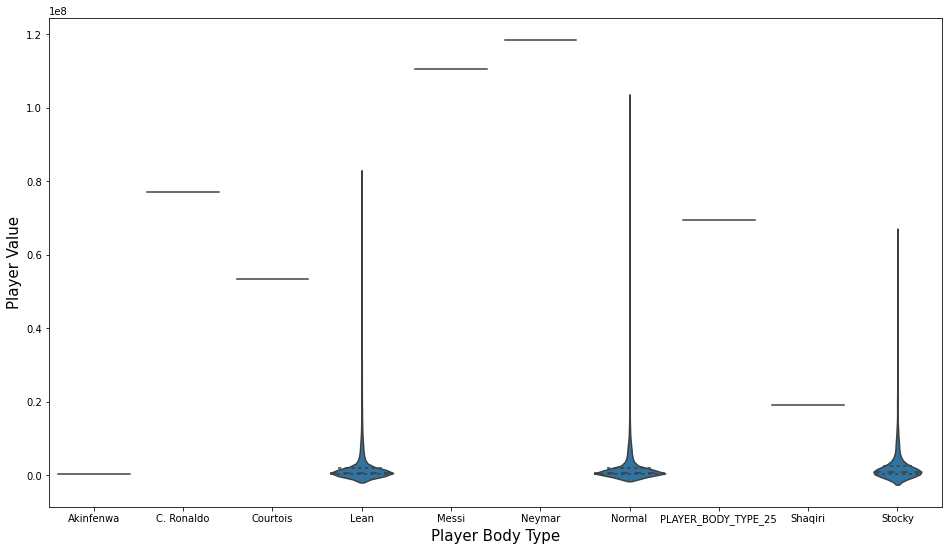

In [64]:
# plotting violin plot
ax = plt.subplots(1,1, figsize=(16,9))

base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'body_type', y = 'value', 
             color = base_color,
              inner = 'quartile')
plt.ylabel('Player Value', color = 'black', fontsize = '15')
plt.xlabel('Player Body Type', color = 'black', fontsize = '15');

# There seems to be a problem with this column, it needs to be cleaned also

> Cleaning the `body_type` column

In [65]:
df.body_type.value_counts()

Normal                 9729
Lean                   5856
Stocky                 1049
Akinfenwa                 1
C. Ronaldo                1
Courtois                  1
Messi                     1
Neymar                    1
PLAYER_BODY_TYPE_25       1
Shaqiri                   1
Name: body_type, dtype: int64

In [66]:
df['body_type'] = df['body_type'].replace(['C. Ronaldo'], 'Normal')

In [67]:
df['body_type'] = df['body_type'].replace(['Messi'], 'Stocky')

In [68]:
df['body_type'] = df['body_type'].replace(['Neymar'], 'Normal')

In [69]:
df['body_type'] = df['body_type'].replace(['Courtois'], 'Lean')

In [70]:
df['body_type'] = df['body_type'].replace(['PLAYER_BODY_TYPE_25'], 'Normal')

In [71]:
df['body_type'] = df['body_type'].replace(['Shaqiri'], 'Normal')

In [72]:
df['body_type'] = df['body_type'].replace(['Akinfenwa'], 'Stocky')

In [73]:
df.body_type.drop_duplicates()

0    Stocky
1    Normal
3      Lean
Name: body_type, dtype: category
Categories (3, object): ['Lean', 'Normal', 'Stocky']

> Visualization

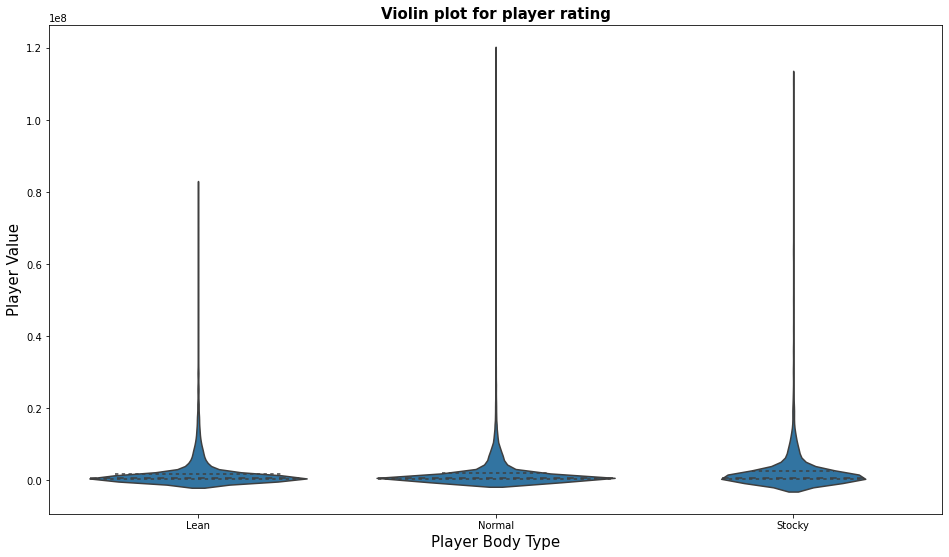

In [74]:
# replotting violin plot
ax = plt.subplots(1,1, figsize=(16,9))

base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'body_type', y = 'value', 
             color = base_color,
              inner = 'quartile')
plt.title('Violin plot for player rating', color = 'black', fontsize = '15', weight = 'bold')
plt.ylabel('Player Value', color = 'black', fontsize = '15')
plt.xlabel('Player Body Type', color = 'black', fontsize = '15');
# Now it's quite normal

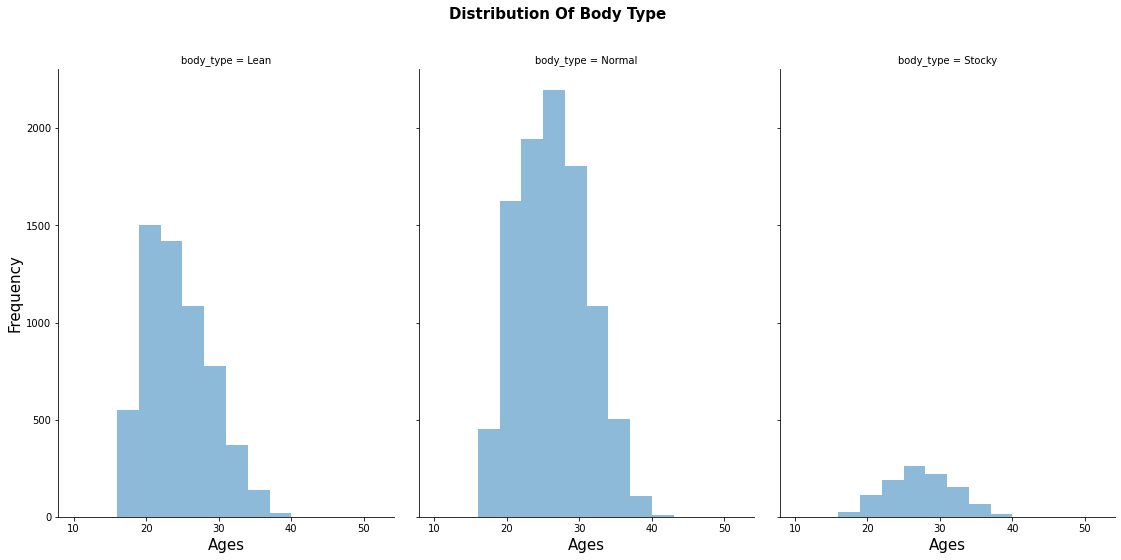

In [75]:
# plotting Facet
bins = np.arange(10, 5+50, 3)
g = sb.FacetGrid(data = df, col = 'body_type')
g.map(plt.hist, 'age', alpha = 0.5, bins = bins);
g.set_ylabels('Frequency', fontsize = '15')
g.set_xlabels('Ages', fontsize = '15')
plt.suptitle('Distribution of body type'.title(), fontsize = 15, weight = 'bold' )
g.fig.set_size_inches(16,9)

> Observation 8: Many players have `normal` body_type while few have `stocky` body_type

#### Players that earn the most

> Visualization

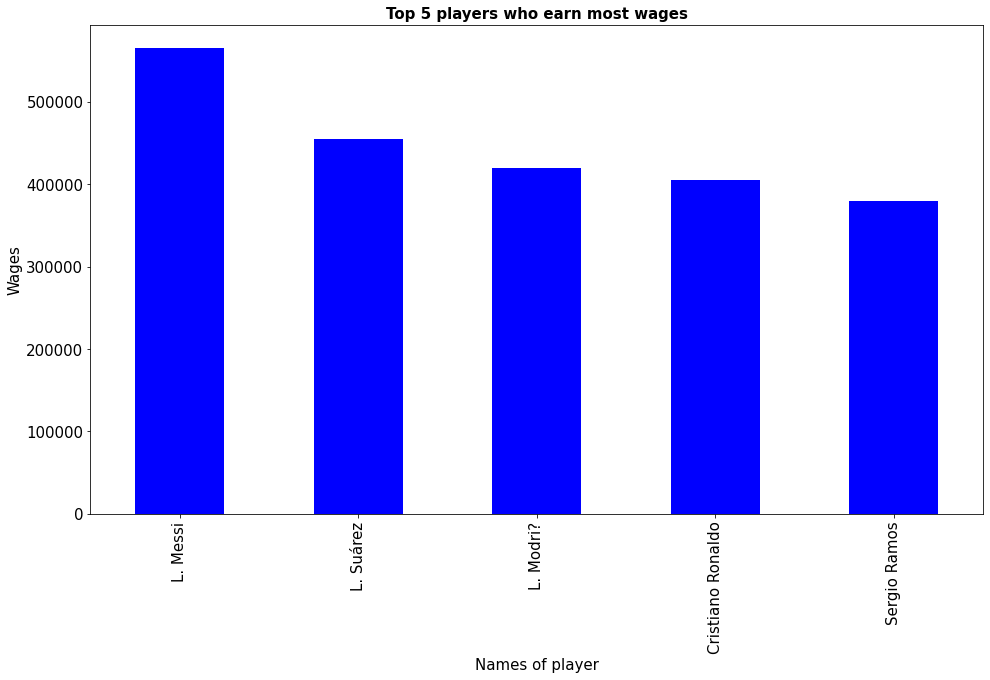

In [76]:
# Group by name then sum the wage.
p_wages = df.groupby('name')['wage'].sum().sort_values(ascending = False).head(5)


#plot
p_bar = p_wages.plot.bar(color = 'blue', fontsize= 15)

#figure size(width, height)
p_bar.figure.set_size_inches(16, 9);

# plot
plt.title("Top 5 players who earn most wages", fontsize = '15', weight = 'bold')
plt.ylabel('Wages', color = 'black', fontsize = '15')
plt.xlabel('Names of player', color = 'black', fontsize = '15');

#### Clubs that pay the most

> Visualization

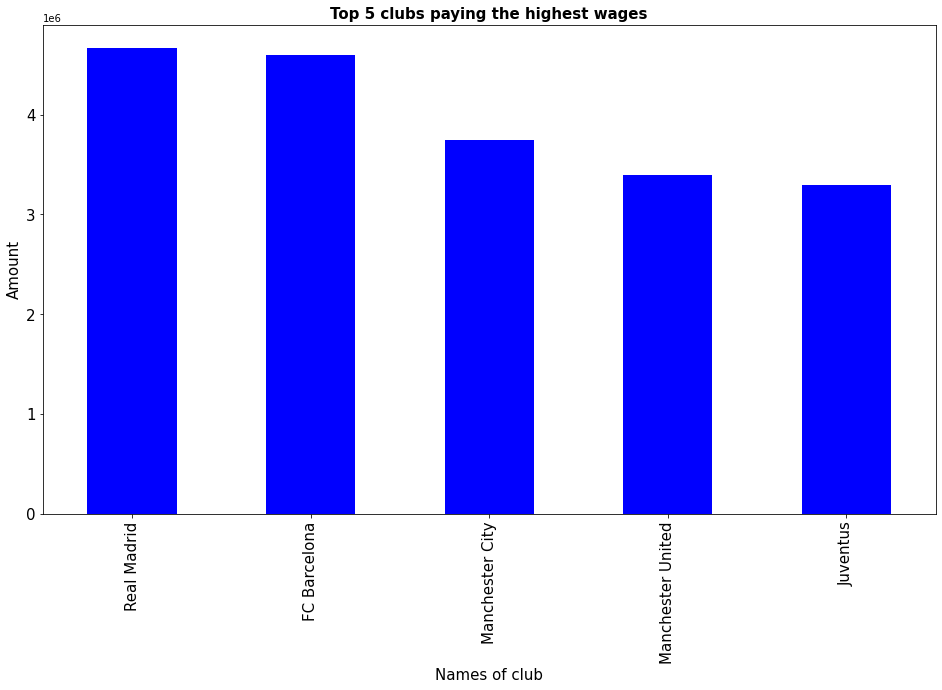

In [77]:
# Group by club then sum the wage.
c_wages = df.groupby('club')['wage'].sum().sort_values(ascending = False).head(5)

# plot
c_bar = c_wages.plot.bar(color = 'blue', fontsize= 15)

#figure size(width, height)
c_bar.figure.set_size_inches(16, 9);

# plot
plt.title("Top 5 clubs paying the highest wages", fontsize = '15', weight = 'bold')
plt.ylabel('Amount', color = 'black', fontsize = '15')
plt.xlabel('Names of club', color = 'black', fontsize = '15');

#### Country with the highest player rating

> Visualization

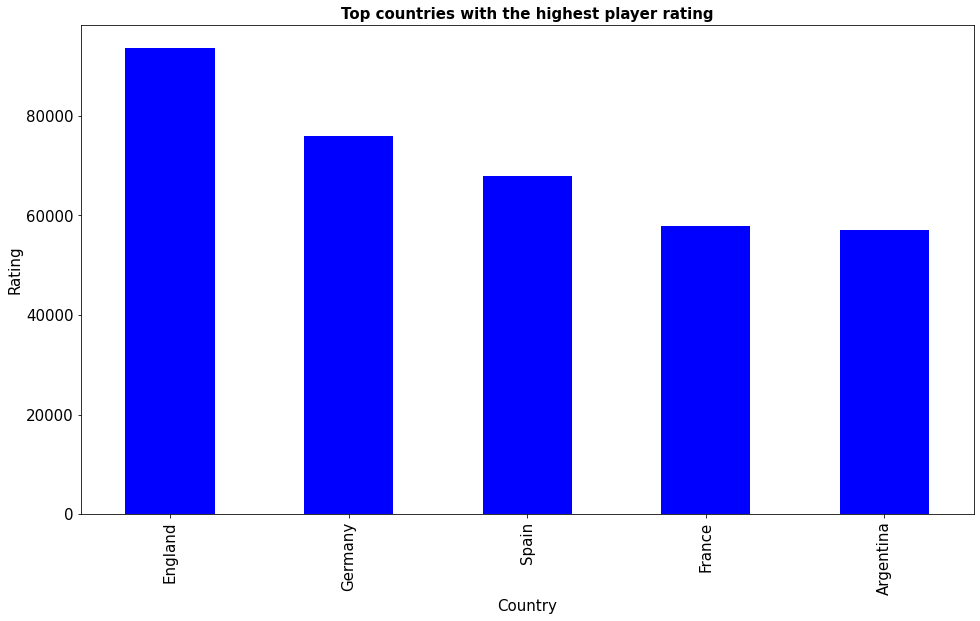

In [78]:
# Group by nationality then sum the value.
p_nation = df.groupby('nationality')['overall'].sum().sort_values(ascending = False).head(5)

# plot
p_bar = p_nation.plot.bar(color = 'blue', fontsize= 15)

#figure size(width, height)
p_bar.figure.set_size_inches(16, 9);

# plot
plt.title("Top countries with the highest player rating", fontsize = '15', weight = 'bold')
plt.ylabel('Rating', color = 'black', fontsize = '15')
plt.xlabel('Country', color = 'black', fontsize = '15');

#### Does nationality have a positive impact on the rating of players?

> Visualization

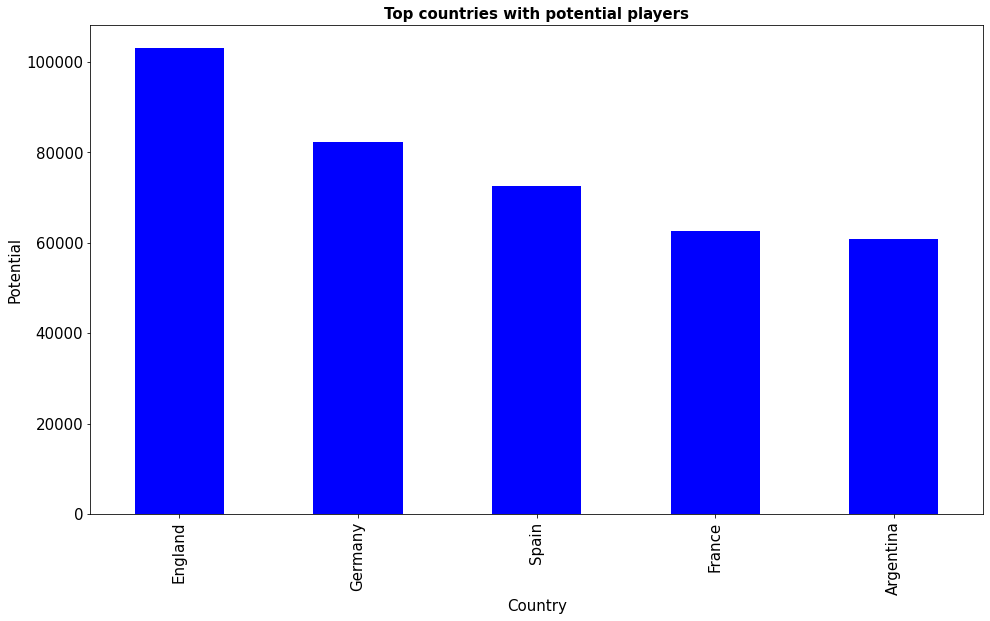

In [79]:
# Group by nationality then sum the value.
p_nation = df.groupby('nationality')['potential'].sum().sort_values(ascending = False).head(5)

# plot
p_bar = p_nation.plot.bar(color = 'blue', fontsize= 15)

#figure size(width, height)
p_bar.figure.set_size_inches(16, 9);

# plot
plt.title("Top countries with potential players", fontsize = '15', weight = 'bold')
plt.ylabel('Potential', color = 'black', fontsize = '15')
plt.xlabel('Country', color = 'black', fontsize = '15');

> Observation 9:
- Messi makes the greatest money of any player.
- R.Madrid has the highest salary.
- England has the most number of players with the highest grade.
- England has a positive influence on players, making it the ideal country to help athletes reach their full potential.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


>- I investigated the link between quantitative and qualitative data elements. For their weaker foot, `right-footed` and `left-footed` athletes were ranked '3' higher. Furthermore, the majority of the players in the sample had a `normal` body type. Only a few players have a `stocky` build.

>- `Wage` and `release_clause` have a favorable relationship. The greater a player's pay, the larger his release clause is imposed by teams. Most football clubs regard it as a method of tying a player to their club.

>- It should come as no surprise that `acc`eleration has a negative relationship with `weight`. The more a player weighs, the slower he moves. As predicted, `age` has a negative relationship with `potential`. According to logic, when a player reaches a certain age, he is no longer considered to be a potential. Young players are often seen as having potential.

>- `wage` is the highest at Real Madrid. This indicates that they have a large number of high-profile players, which is why they are known as the All-Star squad.

>- `Messi` makes the greatest money of any player. I also attempted to determine whether a player's nationality had any bearing on his or her `overall`. I've discovered that English and German players are the most highly regarded. On FIFA19, English players have the highest player `potential`.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Surprisingly, players who play right-forward are rated higher than players who play other positions. The right-wing back and left-wing back are then given the lowest value.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [80]:
player_stats = ['finishing', 'dribbling', 'acc', 'strength', 'stamina', 'marking', 'ball_control', 'age']

> Visualization

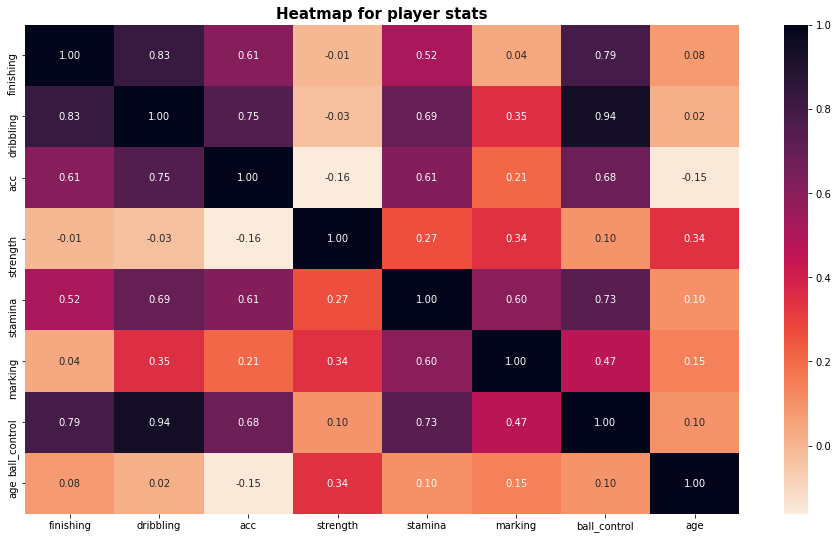

In [81]:
# plotting heatmap
f, ax = plt.subplots(figsize=(16, 9))
plt.title('Heatmap for player stats', color = 'black', fontsize = '15', weight = 'bold')
sb.heatmap(df[player_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

> Visualization

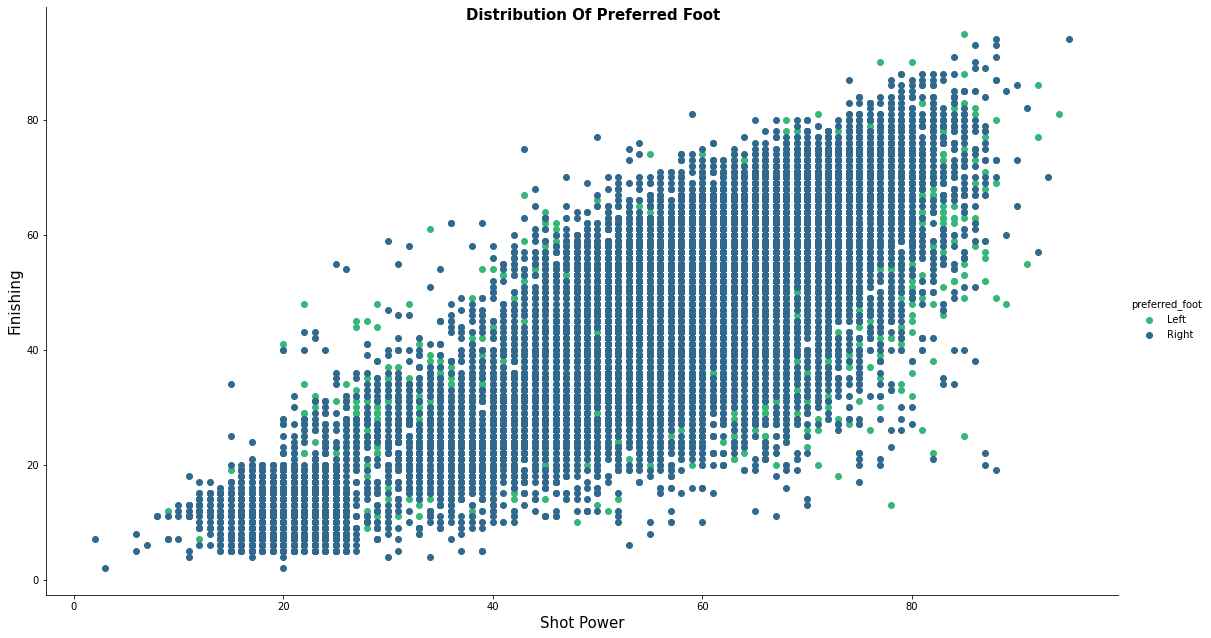

In [82]:
# plotting facet

f = sb.FacetGrid(data = df, hue = 'preferred_foot', size = 8, aspect = 1.4, palette = 'viridis_r')
f.map(plt.scatter, 'shot_power', 'finishing')
f.set_ylabels('Finishing', fontsize = '15')
f.set_xlabels('Shot Power', fontsize = '15')
plt.suptitle('Distribution of preferred foot'.title(), fontsize = 15, weight = 'bold' )
f.fig.set_size_inches(16,9)
f.add_legend();

> Visualization

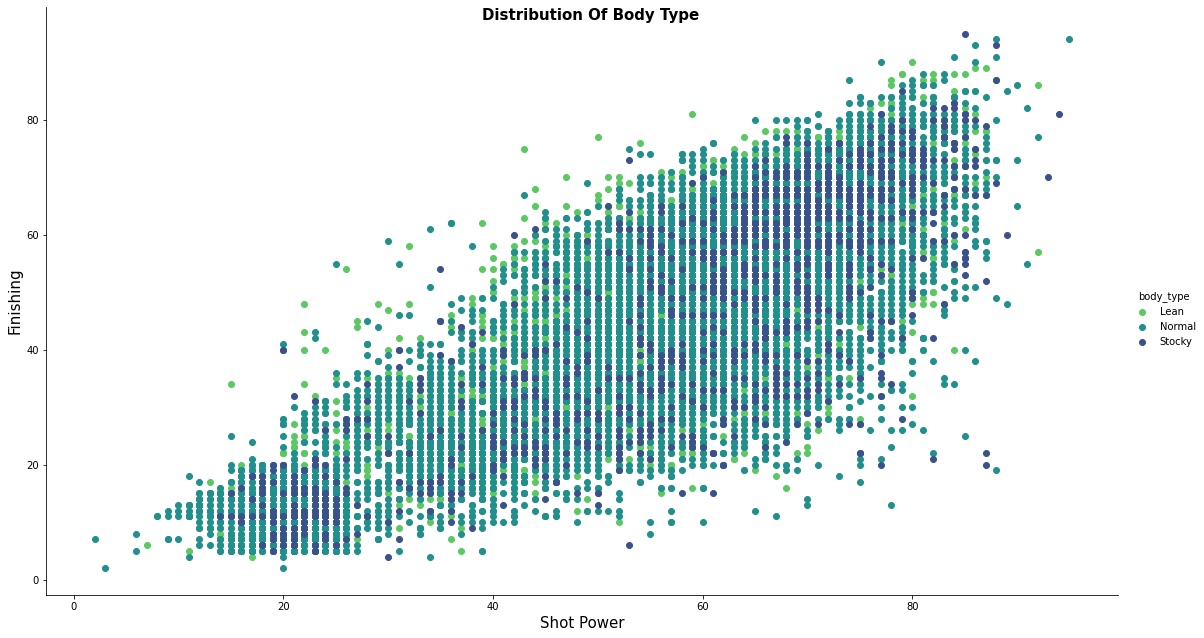

In [83]:
# plotting facet
b = sb.FacetGrid(data = df, hue = 'body_type', size = 8, aspect = 1.4, palette = 'viridis_r')
b.map(plt.scatter, 'shot_power', 'finishing')
b.set_ylabels('Finishing', fontsize = '15')
b.set_xlabels('Shot Power', fontsize = '15')
plt.suptitle('Distribution of body type'.title(), fontsize = 15, weight = 'bold' )
b.fig.set_size_inches(16,9)
b.add_legend();

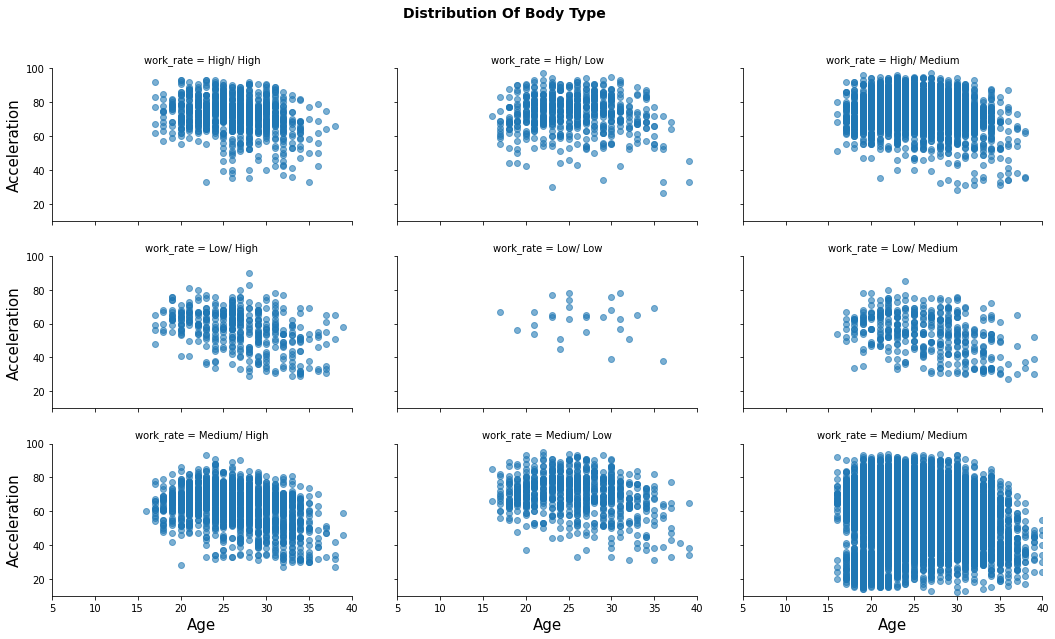

In [86]:
# plotting facet
g = sb.FacetGrid(data = df, col = 'work_rate', col_wrap = 3, size = 2.4, xlim=[5, 40], ylim=[10, 100])
g.map(plt.scatter, 'age', 'acc', alpha = 0.59);
g.set_ylabels('Acceleration', fontsize = '15');
g.set_xlabels('Age', fontsize = '15');
plt.suptitle('Distribution of body type'.title(), fontsize = 14, y = 1, weight = 'bold' );
plt.tight_layout()
g.fig.set_size_inches(16,9);

#### Observations
- There is a positive correlation between `ball_control`, `acc` and `dribbling`
- From the facet plot, many players are right footed.
- Lastly, the final facet plot shows that many players have a `normal` body_type 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I examined the pairwise relationships between players' talents, I discovered several interesting relationships. It's startling to learn that a player's finishing and dribbling abilities have a high positive association.

### Were there any interesting or surprising interactions between features?

> I wanted to investigate how important the Age feature and acceleration may be in terms of a player's work rate. It's evident today that as a person matures, so does his acceleration, but in other circumstances, a player's age has no effect on his work rate. Players with a work rate of High/High, High/Medium, or Low/Low have a higher acceleration, while those with a work rate of Low/Low have a lower acceleration. 


## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.


In [85]:
!jupyter nbconvert Part_I_exploration_template.ipynb --to slides --post serve --template output_toggle

Traceback (most recent call last):
  File "C:\Users\trust\Anaconda3\lib\site-packages\traitlets\traitlets.py", line 537, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\trust\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\trust\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\trust\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\trust\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\trust\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 519, in convert_notebooks
    self.exporter = cls(config=self.config)
  File "C